# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('human_body_temperature.csv')

In [2]:
# Your work here.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### Problem 1

C:\Users\huzmu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


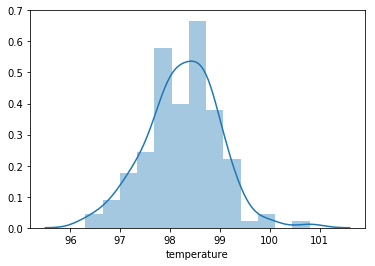

In [3]:
body_temp = df['temperature']
sns.distplot(body_temp)

We can see patterns of a normal distribution in th above graph, but to be sure use the normal distribution test from SciPy

In [4]:
stats.normaltest(body_temp)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

Since the p-value is greater than 0.05 we can say with confidence that this distribution is normal.

### Problem 2

In [5]:
def nec_samp_size(popsize, marginoferror, zscore):
    stdev = 0.50
    x = (zscore**2) * (stdev) * (1-stdev)
    y = marginoferror**2
    z = y*popsize
    a = x / y
    b = x / z
    nec_samp_size = a / (1 + b)
    print("Necessary sample size: ", '%.0f' % nec_samp_size)

In [6]:
nec_samp_size(1000000, 0.1, 1.65)

Necessary sample size:  68


In [7]:
print("Actual sample size:", len(df))

Actual sample size: 130


Assuming our population is a 1000000 people our sample size is adequate for 90 +- 20%

### Problem 3

To test the hypothesis H0: population mean = 98.6 degrees F, I would use a one-sample test, because there is only one group of data, no other group to campare with.

The T test is appropriate to be used here. The reason is because to use a Z test, the population standard deviation must be available. And in the case of thie data set, only the polulation mean, sample mean and sample standard deviation is provided, but not the population standard deviation

In [8]:
stats.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Since our p-value is less than 0.01, we can say the population mean is less than 98.6 F with 99% confidene

### Problem 5

In [9]:
df.temperature.mean()

98.24923076923078

In [10]:
CI_low, CI_high = stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std())
CI_low, CI_high

(96.81221818540311, 99.68624335305844)

Thus, we can say that we are 95% confident that: the human body temperature is 98.25 ± 1.44 degrees F or is between 96.81 to 99.68 degrees F.

Anything outside those intervals is considered statistically "abnormal".

### Problem 6

well use a 2 sample t-test 

In [11]:
temp_gender_df = df[['temperature', 'gender']]
male_temp = temp_gender_df[temp_gender_df.gender=='M']
female_temp = temp_gender_df[temp_gender_df.gender=='F']
stats.ttest_ind(male_temp['temperature'],female_temp['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

C:\Users\huzmu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\huzmu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


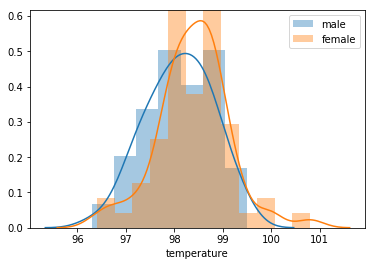

In [12]:
sns.distplot(male_temp['temperature'], label='male')
sns.distplot(female_temp['temperature'], label='female')
plt.legend()

Since our p-value is less than 0.05, we know women are warmer than men with 95% confidence.